In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.compat import lzip
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.diagnostic as sm_diagnostic
from statsmodels.nonparametric.smoothers_lowess import lowess
plt.style.use('seaborn-white')

Data Generation 


In [3]:
N = 300
beta_vec = np.array([10, 5, -3])
x1 = np.linspace(start = 0, stop = 5, num = N)
x2 = np.random.choice(np.linspace(start = 3, stop = 17, num = 80), size = N, replace = True)
e  = np.random.normal(loc = 0, scale = list(range(1, N + 1)), size = N)
x_mat = sm.add_constant(np.column_stack((x1, x2)))
y = np.dot(x_mat, beta_vec) + e
data = pd.DataFrame(np.column_stack([y, x1, x2]), columns = ["y", "x1", "x2"])


Ordinary Least Squares Regression 

In [4]:
model = smf.ols(formula = "y ~ x1 + x2", data = data)
r = model.fit()
print(r.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.3112
Date:                Wed, 24 Aug 2022   Prob (F-statistic):              0.733
Time:                        19:19:15   Log-Likelihood:                -1989.0
No. Observations:                 300   AIC:                             3984.
Df Residuals:                     297   BIC:                             3995.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.6215     33.012      0.201      0.8

Check Assumptions for Linear Regression 
1) Linearity 
2) Residual errors have a mean value of zero.
3) Residual errors have constant variance (Homoscedasticity)
4) Residual errors should be normally distributed
5) No autocorrelation of residuals 
6) No perfect multicollinearity 

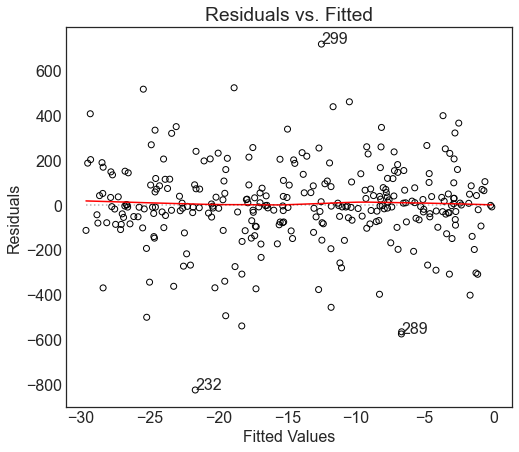

In [5]:
 # 1) Linearity 
 #plot the residuals against the fitted values
residuals = r.resid
fitted = r.fittedvalues
smoothed = lowess(residuals,fitted)
top3 = abs(residuals).sort_values(ascending = False)[:3]
plt.rcParams.update({'font.size': 16})
plt.rcParams["figure.figsize"] = (8,7)
fig, ax = plt.subplots()
ax.scatter(fitted, residuals, edgecolors = 'k', facecolors = 'none')
ax.plot(smoothed[:,0],smoothed[:,1],color = 'r')
ax.set_ylabel('Residuals')
ax.set_xlabel('Fitted Values')
ax.set_title('Residuals vs. Fitted')
ax.plot([min(fitted),max(fitted)],[0,0],color = 'k',linestyle = ':', alpha = .3)
for i in top3.index:
    ax.annotate(i,xy=(fitted[i],residuals[i]))
plt.show()
    

 Linearity seems to hold reasonably well, as the red line is close to the dashed line.

In [6]:
# 2) Mean Residual
mean_residuals = np.mean(residuals)
print(mean_residuals)

7.958078640513123e-15


Very close to zero.  Note: Residuals always sum to zero when an intercept is included

In [7]:
# 3) Check for Homoscedasticity (Apply Breusch–Pagan Test )
BP_t = sm_diagnostic.het_breuschpagan(resid = model.fit().resid, exog_het = model.exog)
print(pd.DataFrame(lzip(['LM statistic', 'p-value',  'F-value', 'F: p-value'], BP_t)))

              0             1
0  LM statistic  5.105216e+01
1       p-value  8.206623e-12
2       F-value  3.045315e+01
3    F: p-value  9.323645e-13


 Since the p-value is lower than 0.05 so we could reject the null hypothesis. The residuals are heteroskedastic.

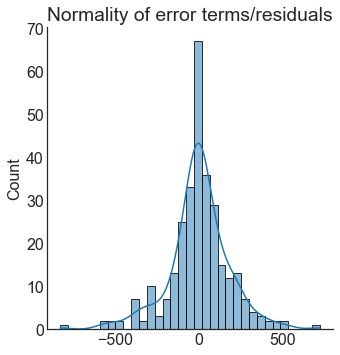

In [9]:
# 4) Check normality of error term 
p = sns.displot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

The residual terms are pretty much normally distributed.


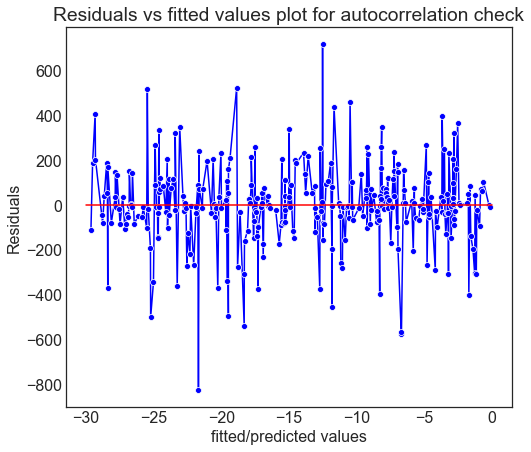

In [11]:
# 5) No autocorrelation of residuals 
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
p = sns.lineplot(fitted,residuals,marker='o',color='blue')
plt.xlabel('fitted/predicted values')
plt.ylabel('Residuals')
p = sns.lineplot([-30,0],[0,0],color='red')
p = plt.title('Residuals vs fitted values plot for autocorrelation check')

There is no autocorrelation

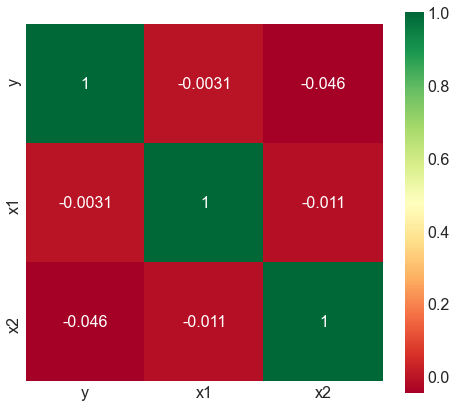

In [12]:
# 6) No perfect multicollinearity 
p=sns.heatmap(data.corr(), annot=True,cmap='RdYlGn',square=True)

This data does not contain perfect multicollinearity among independent variables